<a href="https://colab.research.google.com/github/renhaa/faces/blob/master/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)
%cd gdrive/My\ Drive/faces


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
/content/gdrive/My Drive/faces


In [0]:
import sklearn 
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np 
import matplotlib.pyplot as plt
import cv2


def plot_images(images, nr=8, dim=(2,4), figsize=(16,8),
                show = True, fname = None, grayscale = False):
    fig = plt.figure(figsize=figsize)
    
    for i in range(nr):
        plt.subplot(dim[0], dim[1], i+1)
        if grayscale:
            plt.imshow(images[i], cmap='gray',  interpolation='nearest')
        else:
            plt.imshow(images[i], interpolation='nearest')
        plt.axis('off')
    
    fig.subplots_adjust(wspace=0, hspace=0.03)
    if fname:
        plt.savefig(fname, transparent = True, bbox_inches = 'tight', pad_inches = 0)
        print("Saved to:",fname)
    if show:
        plt.show()
    plt.close()



Saved to: results/PCA/pca.png


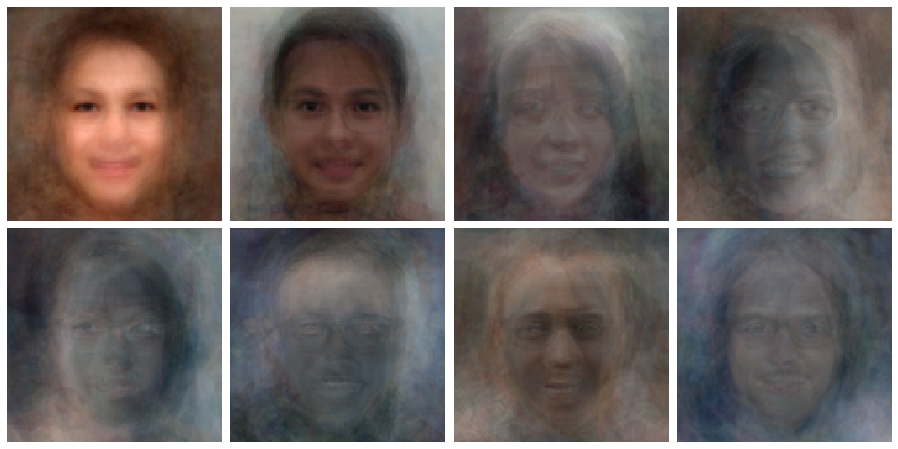

Saved to: results/PCA/pca0.png


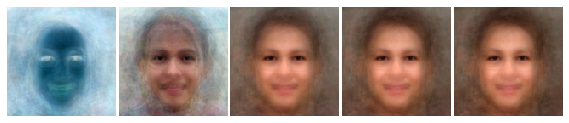

Saved to: results/PCA/pca1.png


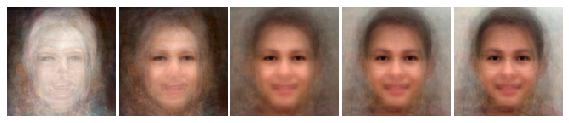

Saved to: results/PCA/pca2.png


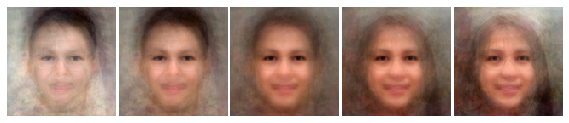

Saved to: results/PCA/pca3.png


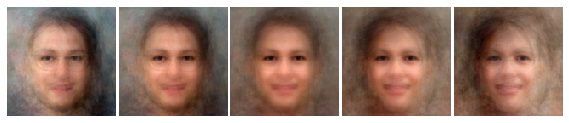

Saved to: results/PCA/pca4.png


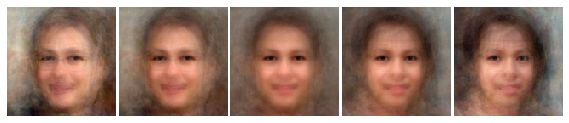

Saved to: results/PCA/pca5.png


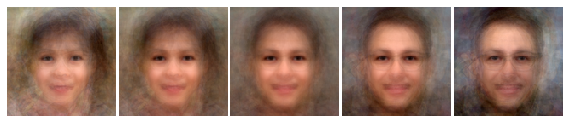

Saved to: results/PCA/pca6.png


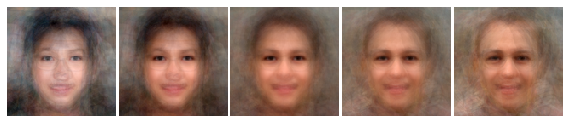

Saved to: results/PCA/pca7.png


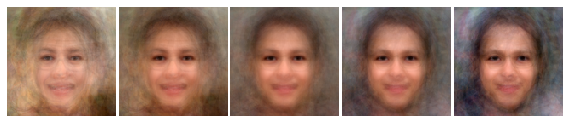

Saved to: results/PCA/pca8.png


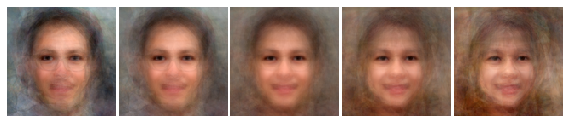

Saved to: results/PCA/pca9.png


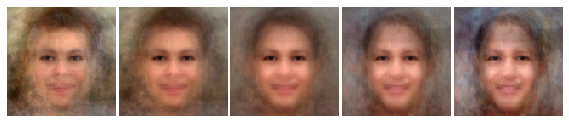

In [0]:
# !rm -r results/PCA
# !mkdir -p results/PCA

X = np.load("data/ffhq/ffhq-100-thumbs.npy")

## Flatten
X_flat = np.zeros((X.shape[0],len(X[0].flatten())))
for i,x in enumerate(X):  
  X_flat[i] = x.flatten()

## PCA
pca = decomposition.PCA(n_components=None)
pca.fit(X_flat.T)
X_pca = pca.transform(X_flat.T).T
X_image = X_pca.reshape(X.shape)

## ReNormalize to 0..1
def normalize(X_image):
    X_image = X_image - np.amin(X_image)
    X_image = X_image/np.max(X_image)
    return X_image
X_image = normalize(X_image)
plot_images(X_image, fname = "results/PCA/pca.png")

mean_face = np.mean(X_flat,axis=0).reshape(X[0].shape)
for pc in range(10):
    pca_component_interpolations = []
    for i in [-1,-.5,0,.5,1]:
        img = normalize(mean_face + i*X_image[pc])
        pca_component_interpolations.append(img)
    plot_images(pca_component_interpolations,  nr = 5,figsize=(10,2) ,dim=(1,5), fname = f"results/PCA/pca{pc}.png")

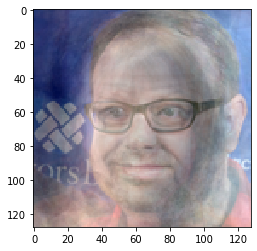

In [0]:
X_flat.shape
X_pca.shape

img = X_flat[0]

X_reconstruct = np.zeros(img.shape)

for eigenface in X_pca:
   X_reconstruct += (np.dot(img,eigenface))*eigenface


X_reconstruct = X_reconstruct.reshape(X[0].shape)

# plt.imshow(X_reconstruct)


plt.imshow(normalize(X_reconstruct))
np.max(X_reconstruct)


# plt.imshow(X_reconstruct)

img = normalize(normalize(X[78] + 4*X_image[4]))
plt.imshow(img)
